<a href="https://colab.research.google.com/github/ToluGb/Hamoye-DSI-2020/blob/master/HSDC_Stage_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow import keras
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [4]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [5]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


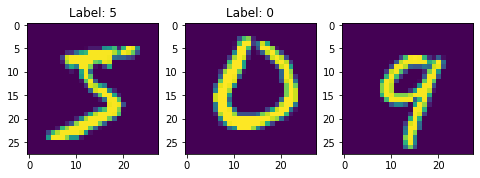

In [6]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()

In [8]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255.
# Dividing the data by 255 scales to the required range

train_images = train_images / 255.0
test_images = test_images / 255.0

Split training data to training and validation sets.py

In [10]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


Reshape data from 28 * 28 array to a single array.py

In [11]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

Encode labels to categorical variables.py

In [14]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

Activation functions and Neural Networks hyperparameters.py

In [17]:
# inputs
#placeholders are not enabled in tf 2
X = tf.compat.v1.placeholder(tf.float32, [None, new_dimension])
Y = tf.compat.v1.placeholder(tf.float32, [None, no_labels])

In [18]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [19]:
logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [21]:
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))

     #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))
    

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9128999710083008


In [22]:
# Building a Sequential Feed Forward Network in Keras

# The model definition
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Defining the model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

# training the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

# Evaluating the model on the test set using loss and accuracy
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.6987 - acc: 0.8159WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6903 - acc: 0.8179 - val_loss: 0.2624 - val_acc: 0.9234
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2384 - acc: 0.9308 - val_loss: 0.1844 - val_acc: 0.9491
Epoch 3/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1736 - acc: 0.9498 - val_loss: 0.1516 - val_acc: 0.9591
Epoch 4/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1340 - acc: 0

Text(0.5, 1.0, 'Loss curves - before regularisation')

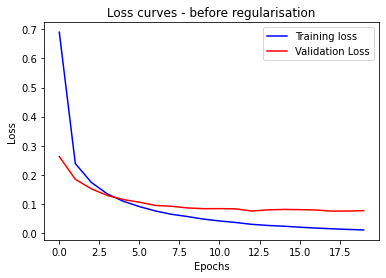

In [23]:
# Check for Overfitting

# Plotting the training and validation loss

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curves - before regularisation')

Text(0.5, 1.0, 'Accuracy Curves - before regularisation')

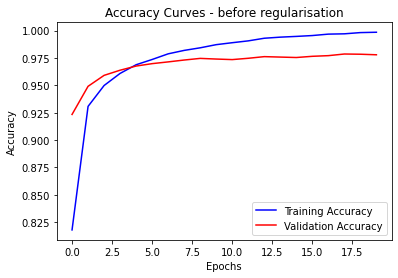

In [24]:
# Plotting the training and validation accuracy
plt.figure()
plt.plot(history.history['acc'], 'blue')
plt.plot(history.history['val_acc'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves - before regularisation')

In [25]:
# Although the validation and training loss seem great, we can see that the validation loss increases. 
# This identifies overfitting in our network. How do we proceed? Introduce regularisation to the model.

# loading the Dropout regularization parameter
from tensorflow.keras.layers import Dropout

# Defining the model architecture of the regularized model to eliminate overfitting
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

# Compiling the model
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

# training thr model
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

# Evaluating the regularized model on test set
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9853 - acc: 0.6879 - val_loss: 0.2920 - val_acc: 0.9165
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3725 - acc: 0.8909 - val_loss: 0.1970 - val_acc: 0.9426
Epoch 3/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.2781 - acc: 0.9201 - val_loss: 0.1585 - val_acc: 0.9552
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2248 - acc: 0.9339 - val_loss: 0.1371 - val_acc: 0.9604
Epoch 5/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1942 - acc: 0.9429 - val_loss: 0.1205 - val_acc: 0.9642
Epoch 6/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1713 - acc: 0.9504 - val_loss: 0.1101 - val_acc: 0.9665
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1505 - acc: 0.9548 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

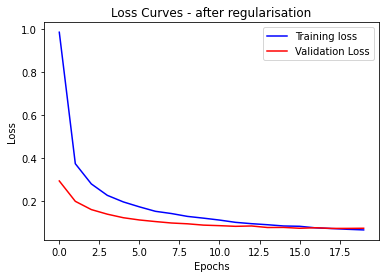

In [26]:
# Plotting the training and validation loss 

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

Text(0.5, 1.0, 'Accuracy Curves - after regularisation')

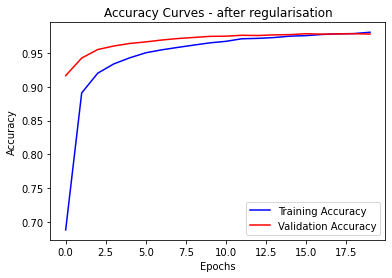

In [27]:
# Plotting the training abd validation accuracy

plt.figure()
plt.plot(reg_history.history['acc'], 'blue')
plt.plot(reg_history.history['val_acc'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves - after regularisation')